# DATA SCRAPPING

#### Setup of the data scrapping with the google YouTube API

In [7]:
# Import the googleapiclient.discovery from the Build library
from googleapiclient.discovery import build
import creds  # Import your API key from the creds module

# Build YouTube API service
youtube = build('youtube', 'v3', developerKey=creds.API_KEY)

# Make API requests to retrieve comments (example for a specific video)
video_id = 'uiUPD-z9DTg'  # Replace with the actual video ID

# Request the video comments
comments = []
next_page_token = None

while True:
    comments_request = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText',
        pageToken=next_page_token
    )

    comments_response = comments_request.execute()

    # Extract comments, usernames, and dates from the response
    for item in comments_response['items']:
        comment_text = item['snippet']['topLevelComment']['snippet']['textDisplay']
        username = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
        comment_date = item['snippet']['topLevelComment']['snippet']['publishedAt']

        comment_info = {
            'username': username,
            'date': comment_date,
            'comment': comment_text,
        }

        comments.append(comment_info)

    # Check if there are more pages
    next_page_token = comments_response.get('nextPageToken')
    if not next_page_token:
        break

# Now, `comments` contains all the retrieved comments for processing
print(comments)  # Print or further process as needed


AttributeError: module 'creds' has no attribute 'API_KEY'

# Data Importation

In [2]:
# import pandas for data importation
import pandas as pd

youtube_comments = pd.DataFrame(comments)
youtube_comments

,username,date,comment
0,@nathanaelarumugam5301,2024-05-27T01:27:26Z,I hope the law-enforcement associations in Ame...
1,@Aforestmyth,2024-05-26T23:16:24Z,If you cant dazzle them with brillance then ba...
2,@thecleeds,2024-05-26T19:41:21Z,he says the US is the only military power that...
3,@comradeyuri8492,2024-05-26T18:18:06Z,When not if the BRICS nation spring their gold...
4,@eziodematteo,2024-05-26T18:00:29Z,Is ted the one of the movie?
...,...,...,...
9733,@salomoniezpizzaeria3349,2023-06-14T16:31:05Z,2024 nuke🎅
9734,@ImanZahra-lp8pf,2023-06-14T16:26:12Z,Love from pakistan 🔥
9735,@winnerswritethestory3370,2023-06-14T16:25:44Z,I had that gut feeling this is bout the upcomi...
9736,@f.b.i9572,2023-06-14T16:23:50Z,It's India... No question


In [3]:
# Save the DataFrame to a CSV file
filename = 'youtube_comments_df.csv'  # Change the filename as needed
youtube_comments.to_csv(filename, index=False)

print(f"Comments saved to {filename}")

Comments saved to youtube_comments_df.csv


### Sentiment Analysis

In [4]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# import the libraries that will be use
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
# Download VADER lexicon
nltk.download('vader_lexicon')

def perform_sentiment_analysis(data):
    # Initialize the Sentiment Intensity Analyzer
    sia = SentimentIntensityAnalyzer()

    # Add a new column for sentiment scores
    data['Sentiment Score'] = data['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Categorize sentiment based on the compound score
    data['Sentiment'] = data['Sentiment Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

    return data

# Perform sentiment analysis
sent_data = perform_sentiment_analysis(youtube_comments)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Display the result
sent_data

,username,date,comment,Sentiment Score,Sentiment
0,@nathanaelarumugam5301,2024-05-27T01:27:26Z,I hope the law-enforcement associations in Ame...,0.6486,Positive
1,@Aforestmyth,2024-05-26T23:16:24Z,If you cant dazzle them with brillance then ba...,-0.5859,Negative
2,@thecleeds,2024-05-26T19:41:21Z,he says the US is the only military power that...,0.0890,Positive
3,@comradeyuri8492,2024-05-26T18:18:06Z,When not if the BRICS nation spring their gold...,-0.1511,Negative
4,@eziodematteo,2024-05-26T18:00:29Z,Is ted the one of the movie?,0.0000,Neutral
...,...,...,...,...,...
9733,@salomoniezpizzaeria3349,2023-06-14T16:31:05Z,2024 nuke🎅,0.0000,Neutral
9734,@ImanZahra-lp8pf,2023-06-14T16:26:12Z,Love from pakistan 🔥,0.6369,Positive
9735,@winnerswritethestory3370,2023-06-14T16:25:44Z,I had that gut feeling this is bout the upcomi...,0.1280,Positive
9736,@f.b.i9572,2023-06-14T16:23:50Z,It's India... No question,-0.2960,Negative


In [8]:
# Save the DataFrame to a CSV file
filename2 = 'sentiment_score_youtube_comments_df.csv'  # Change the filename as needed
youtube_comments.to_csv(filename2, index=False)

print(f"Comments saved to {filename2}")

Comments saved to sentiment_score_youtube_comments_df.csv


In [9]:
# Descriptive statistics
print(sent_data['Sentiment Score'].describe())

# Count of each sentiment
print(sent_data['Sentiment'].value_counts())

count    9738.000000
mean        0.000313
std         0.492994
min        -0.997800
25%        -0.363425
50%         0.000000
75%         0.381800
max         0.999800
Name: Sentiment Score, dtype: float64
Sentiment
Positive    3591
Negative    3587
Neutral     2560
Name: count, dtype: int64


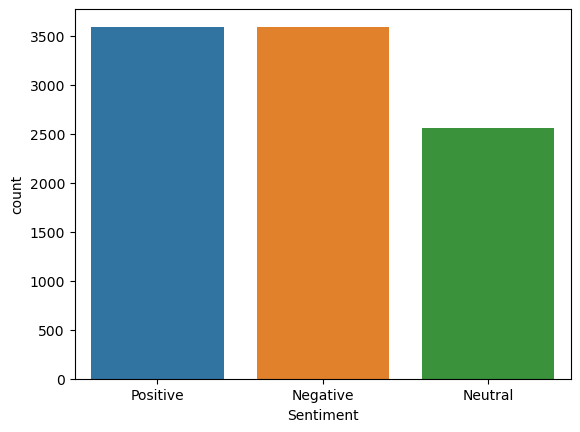

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of sentiment distribution
sns.countplot(x='Sentiment', data=sent_data)
plt.show()

In [11]:
# if not installed, Install wordcloud

In [12]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Tokenize and filter function
def extract_keywords(text, sentiment_threshold=0):
    words = nltk.word_tokenize(text.lower())
    filtered_words = [word for word in words if word.isalpha() and word.lower() not in stop_words]
    sentiment_score = sia.polarity_scores(' '.join(filtered_words))['compound']
    return ' '.join(filtered_words) if sentiment_score >= sentiment_threshold else ''

# Apply the function to each comment
sent_data['Processed_Comment'] = sent_data['comment'].apply(lambda x: extract_keywords(x, sentiment_threshold=0.2))

# Combine processed comments into a single string
all_comments = ' '.join(sent_data['Processed_Comment'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


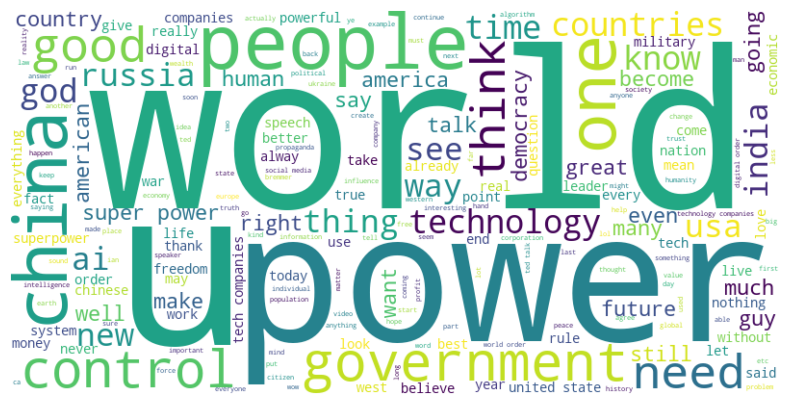

In [15]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
pip install nbconvert[webpdf]